In [3]:
using LinearAlgebra

A = [2 -7 0;
     5 10 4;
     0 5 2]

eigenvalues, eigenvectors = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 2.0000000000000004
 4.999999999999987
 7.000000000000014
vectors:
3×3 Matrix{Float64}:
 -0.624695      0.76835    0.703526
 -2.39683e-17  -0.329293  -0.502519
  0.780869     -0.548821  -0.502519

In [1]:
using LinearAlgebra

A = [
    1.0   0.0   2.0  -1.8   0.0;
    0.0   5.1   0.0  -1.0   3.0;
    1.0   2.0  -3.0   0.0   0.0;
    0.0   1.0  -3.1   4.0   0.0;
   -2.8   0.0   0.0   1.5   1.0
]

eigenvalues, eigenvectors = eigen(A)


Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
5-element Vector{Float64}:
 -2.9236178482981754
 -0.15533809641464663
  2.028824312245176
  4.095614975575989
  5.054516656891652
vectors:
5×5 Matrix{Float64}:
  0.262219  -0.301294   -0.313235  -0.280232  -0.0312209
 -0.162664   0.466599   -0.64181   -0.836611  -0.949058
 -0.826218   0.222136   -0.31754   -0.275304  -0.239535
 -0.346439   0.0534311  -0.173787   0.176045  -0.195825
  0.31957   -0.799567    0.599108   0.338775  -0.0508861

In [2]:
using LinearAlgebra

A = [0 0 1;
     0 1 0;
     1 0 0]

eigenvalues, eigenvectors = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -0.9999999999999989
  1.0
  1.0
vectors:
3×3 Matrix{Float64}:
 -0.707107   0.0  0.707107
  0.0       -1.0  0.0
  0.707107   0.0  0.707107

In [3]:
using LinearAlgebra

A = [2 1 2;
     3 0 6;
     -4 0 -3]

eigenvalues, eigenvectors = eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
3-element Vector{ComplexF64}:
 -3.0000000000000013 + 0.0im
   0.999999999999999 - 1.999999999999999im
   0.999999999999999 + 1.999999999999999im
vectors:
3×3 Matrix{ComplexF64}:
 -3.46472e-17+0.0im      0.235702+0.471405im      0.235702-0.471405im
     0.894427+0.0im      0.707107-0.0im           0.707107+0.0im
    -0.447214+0.0im  -2.88118e-16-0.471405im  -2.88118e-16+0.471405im

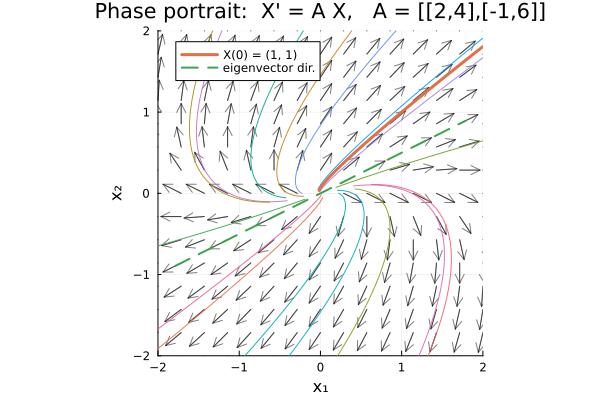

"/Users/rafif/Documents/Purdue First Year/gradcourses/phase_portrait_hw11_6.pdf"

In [15]:
using LinearAlgebra
using Plots
gr()  # or plotly(), pyplot(), etc.

# ===================== PARAMETERS (customize here) =====================
A = [2.0 4.0; -1.0 6.0]

# Plot window & grid density for the vector field
xlim = (-2.0, 2.0)
ylim = (-2.0, 2.0)
gridN = 15                # number of arrows per axis (increase for denser quiver)

# Trajectory time span and sampling
tmin, tmax = -0.6, 0.6    # symmetric time window works well here
Nt   = 400                # points per trajectory

# Initial conditions to sample (besides the highlighted one)
init_grid = [-1.5, -0.5, 0.5, 1.5]
inits = [[xi, yi] for xi in init_grid for yi in init_grid]

# Highlighted solution
X0_special = [1.0, 1.0]

# Style
arrow_scale = 0.25        # smaller -> shorter arrows
lw_traj = 1.0             # line width for generic trajectories
lw_special = 3.0          # line width for the highlighted trajectory
alpha_traj = 0.9
# ======================================================================

# ---- Jordan-form solution pieces (defective with λ=4) ----
λ = 4.0
v = [2.0, 1.0]   # eigenvector
w = [1.0, 1.0]   # generalized eigenvector
VW = hcat(v, w)
VW_inv = inv(VW)

# analytic trajectory for arbitrary X0
function traj(tvec::AbstractVector, X0::AbstractVector)
    c1, c2 = VW_inv * X0
    # X(t) = e^{λ t} ( c1*v + c2*(t*v + w) )
    X = [exp(λ*t) .* (c1 .* v .+ c2 .* (t .* v .+ w)) for t in tvec]
    hcat(X...)'  # return as Nt×2 matrix
end

# ---- vector field (quiver) ----
xs = range(xlim[1], xlim[2], length=gridN)
ys = range(ylim[1], ylim[2], length=gridN)

# Build quiver arrays
Xg = repeat(xs', length(ys), 1)
Yg = repeat(ys, 1, length(xs))

U = similar(Xg)
V = similar(Yg)
for j in axes(Xg,2), i in axes(Xg,1)
    u = A * [Xg[i,j]; Yg[i,j]]
    U[i,j] = u[1]; V[i,j] = u[2]
end

# Normalize for readability, then scale with arrow_scale
N = sqrt.(U.^2 .+ V.^2) .+ 1e-12
Uq = arrow_scale .* U ./ N
Vq = arrow_scale .* V ./ N

# ---- make the plot ----
plt = plot(; xlabel="x₁", ylabel="x₂",
            xlim=xlim, ylim=ylim, aspect_ratio=1,
            title="Phase portrait:  X' = A X,   A = [[2,4],[-1,6]]")

# quiver background
quiver!(vec(Xg), vec(Yg), quiver=(vec(Uq), vec(Vq)),
        linealpha=0.5, color=:black, label=nothing)

# time vector
tvec = range(tmin, tmax, length=Nt)

# sample trajectories
for X0 in inits
    XY = traj(tvec, X0)
    plot!(XY[:,1], XY[:,2], lw=lw_traj, alpha=alpha_traj, label=nothing)
end

# highlighted trajectory for X(0) = (1,1)
XYs = traj(tvec, X0_special)
plot!(XYs[:,1], XYs[:,2], lw=lw_special, label="X(0) = (1, 1)")

# eigenvector direction (dashed line through origin)
vv = v / norm(v)
s = range(-2, 2, length=2)
plot!(s .* vv[1], s .* vv[2], ls=:dash, lw=2, label="eigenvector dir.")

display(plt)
savefig(plt, "phase_portrait_hw11_6.pdf")


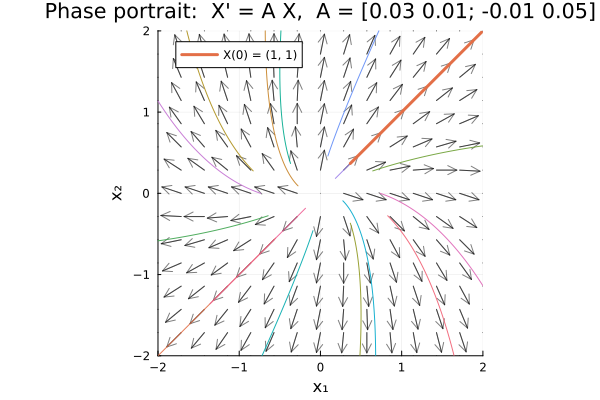

"/Users/rafif/Documents/Purdue First Year/gradcourses/phase_portrait_hw11_16.pdf"

In [16]:
using LinearAlgebra
using Plots
gr()  # choose your backend

# ===================== PARAMETERS (customize) =====================
A = [0.03 0.01; -0.01 0.05]  # system matrix

# Plot window & grid density
xlim = (-2.0, 2.0)
ylim = (-2.0, 2.0)
gridN = 15                   # arrows per axis

# Trajectory time span and sampling (slower dynamics -> use wider window)
tmin, tmax = -25.0, 25.0
Nt   = 600

# Initial conditions to sample (besides the highlighted one)
init_grid = [-1.5, -0.5, 0.5, 1.5]
inits = [[xi, yi] for xi in init_grid for yi in init_grid]

# Highlighted solution
X0_special = [1.0, 1.0]

# Style
arrow_scale = 0.25
lw_traj = 1.0
lw_special = 3.0
alpha_traj = 0.9
# =================================================================

# ---- trajectory via matrix exponential: X(t) = exp(A t) * X0 ----
function traj(tvec::AbstractVector, X0::AbstractVector, A::AbstractMatrix)
    X = [exp(A * t) * X0 for t in tvec]   # list of 2-vectors
    hcat(X...)'                            # Nt×2 matrix
end

# ---- vector field (quiver) ----
xs = range(xlim[1], xlim[2], length=gridN)
ys = range(ylim[1], ylim[2], length=gridN)

Xg = repeat(xs', length(ys), 1)
Yg = repeat(ys, 1, length(xs))

U = similar(Xg); V = similar(Yg)
for j in axes(Xg,2), i in axes(Xg,1)
    u = A * [Xg[i,j]; Yg[i,j]]
    U[i,j] = u[1]; V[i,j] = u[2]
end

# Normalize arrows for readability
N = sqrt.(U.^2 .+ V.^2) .+ 1e-12
Uq = arrow_scale .* U ./ N
Vq = arrow_scale .* V ./ N

# ---- plot ----
plt = plot(; xlabel="x₁", ylabel="x₂",
            xlim=xlim, ylim=ylim, aspect_ratio=1,
            title="Phase portrait:  X' = A X,  A = [0.03 0.01; -0.01 0.05]")

# vector field
quiver!(vec(Xg), vec(Yg), quiver=(vec(Uq), vec(Vq)),
        linealpha=0.5, color=:black, label=nothing)

# time vector
tvec = range(tmin, tmax, length=Nt)

# sample trajectories
for X0 in inits
    XY = traj(tvec, X0, A)
    plot!(XY[:,1], XY[:,2], lw=lw_traj, alpha=alpha_traj, label=nothing)
end

# highlighted trajectory for X(0) = (1,1)
XYs = traj(tvec, X0_special, A)
plot!(XYs[:,1], XYs[:,2], lw=lw_special, label="X(0) = (1, 1)")

display(plt)
savefig(plt, "phase_portrait_hw11_16.pdf")

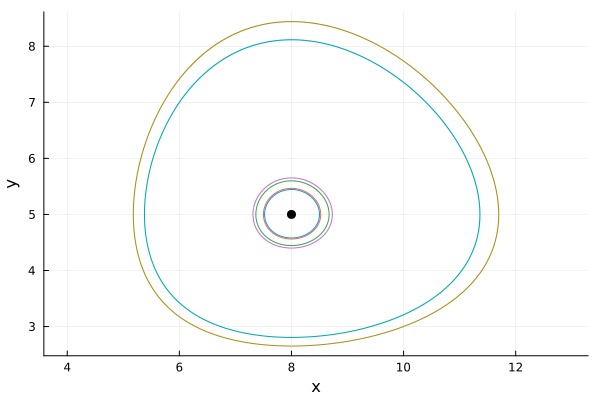

"/Users/rafif/Documents/Purdue First Year/gradcourses/phase_portrait_hw11_10.pdf"

In [18]:
using DifferentialEquations, Plots

function lv!(du,u,p,t)
    x,y = u
    du[1] = -0.1*x + 0.02*x*y
    du[2] =  0.2*y - 0.025*x*y
end

tspan = (0.0, 300.0)

inits = [(8.5,5.0),(7.5,5.0),(8.0,5.6),(8.0,4.4),(10.0,3.0),(6.0,7.0)]
plt = plot(xlabel="x", ylabel="y", legend=false, aspect_ratio=1)

for u0 in inits
    prob = ODEProblem(lv!, collect(u0), tspan)
    sol  = solve(prob, Tsit5(); reltol=1e-9, abstol=1e-12)
    plot!(plt, sol[1,:], sol[2,:])
end

scatter!(plt, [8.0], [5.0], ms=5, c=:black)  # equilibrium
display(plt)
savefig(plt, "phase_portrait_hw11_10.pdf")


In [17]:
using DifferentialEquations, Plots, Random
gr()  # or your preferred backend

# Vector field for the system
#   x' = μx + y - x^3
#   y' = -x + μy - 2y^3
function vf!(du, u, p, t)
    x, y = u
    μ = p
    du[1] = μ*x + y - x^3
    du[2] = -x + μ*y - 2y^3
end

# Make a phase portrait for a given μ
function phaseportrait(μ; xlim=(-2,2), ylim=(-2,2), tf=300.0, tspan=(0.0,300.0),
                       ngrid=15, ntraj=3)
    xs = range(xlim[1], xlim[2], length=ngrid)
    ys = range(ylim[1], ylim[2], length=ngrid)
    X  = repeat(xs', length(ys), 1)
    Y  = repeat(ys, 1, length(xs))
    U  = similar(X); V = similar(Y)

    for j in axes(Y,1), i in axes(X,2)
        x = X[j,i]; y = Y[j,i]
        U[j,i] = μ*x + y - x^3
        V[j,i] = -x + μ*y - 2y^3
    end

    S = sqrt.(U.^2 .+ V.^2) .+ 1e-9
    Uq, Vq = 0.35*U ./ S, 0.35V ./ S

    plt = quiver(vec(X), vec(Y), quiver=(vec(Uq), vec(Vq)),
                 xlim=xlim, ylim=ylim, legend=false, aspect_ratio=:equal, color=:black, linealpha=0.3,
                 xlabel="x", ylabel="y", title="Phase portrait, μ = $(round(μ,digits=3))")

    # --- Deterministic circular initial conditions ---
    rs = range(0.3, 1.8; length=ntraj)
    thetas = range(0, 2π, length=5)[1:end-1]  # avoid duplicate 2π
    inits = [[r*cos(θ), r*sin(θ)] for r in rs for θ in thetas]

    for u0 in inits
        prob = ODEProblem(vf!, u0, tspan, μ)
        sol = solve(prob; reltol=1e-9, abstol=1e-9)
        plot!(plt, getindex.(sol.u,1), getindex.(sol.u,2), lw=2)
    end

    # Predicted limit-cycle radius (supercritical case)
    if μ > 0
        rstar = sqrt(8μ/9)
        θ = range(0, 2π, length=400)
        plot!(plt, rstar .* cos.(θ), rstar .* sin.(θ), lw=2, ls=:dash, label=false, color=:black)
        annotate!(plt, (rstar/√2, rstar/√2, Plots.text("r* = √(8μ/9)", 8)))
    end

    return plt
end


# === Produce a 1×3 panel for μ = -0.2, 0.0, 0.2 (edit as you like) ===
μs = [-0.2, 0.0, 0.2]
plot(phaseportrait.(μs)..., layout=(1,3), size=(1200,400))

savefig("phase_portraits.pdf")


"/Users/rafif/Documents/Purdue First Year/gradcourses/phase_portraits.pdf"